2019-09-11 21:24:36.698331
2019-09-11 21:24:48.989610
0:00:12.291279


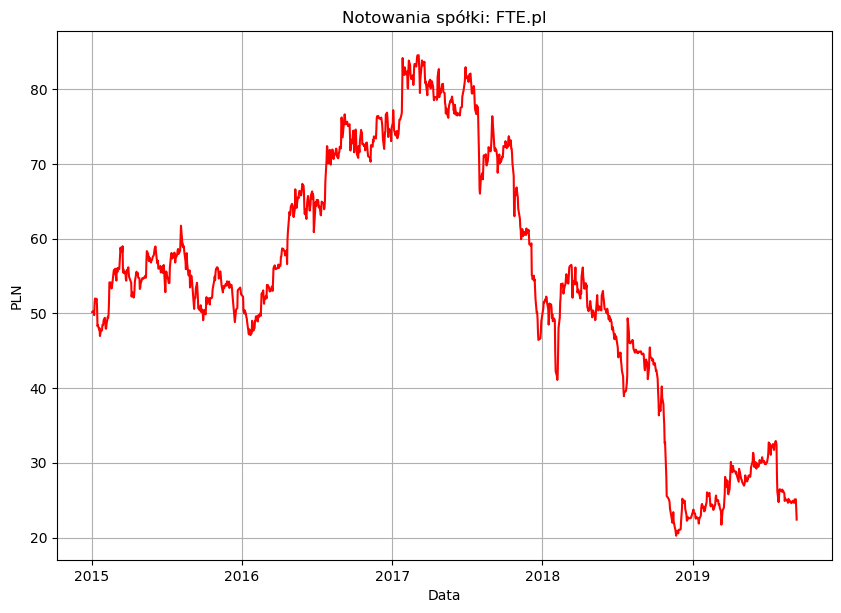

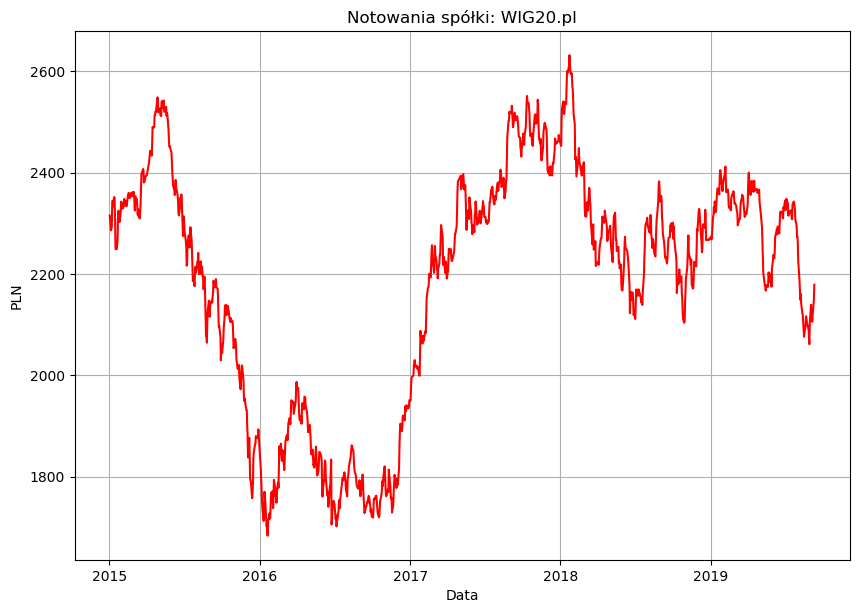

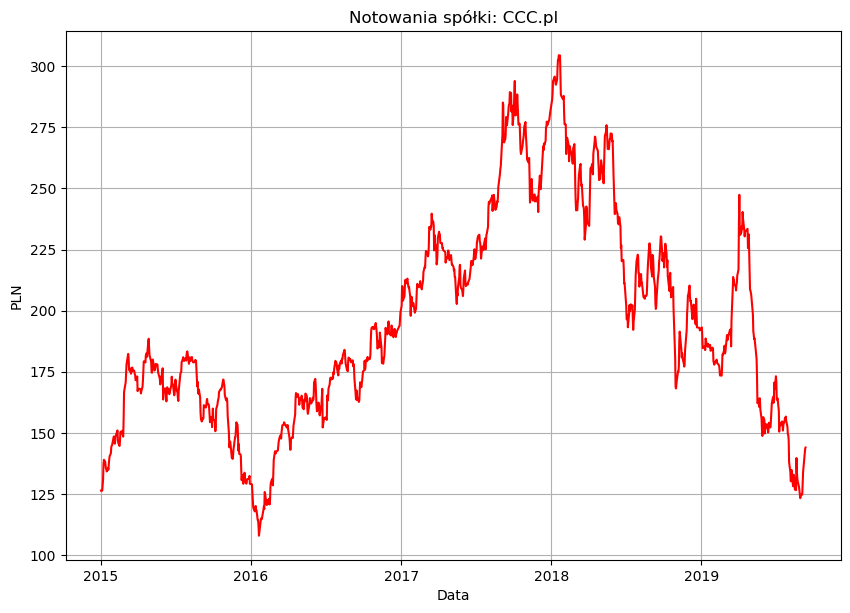

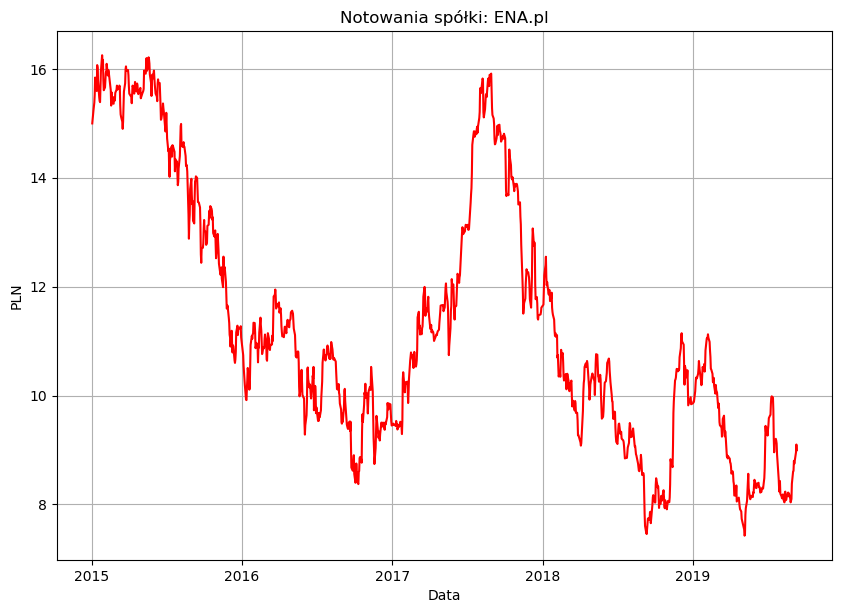

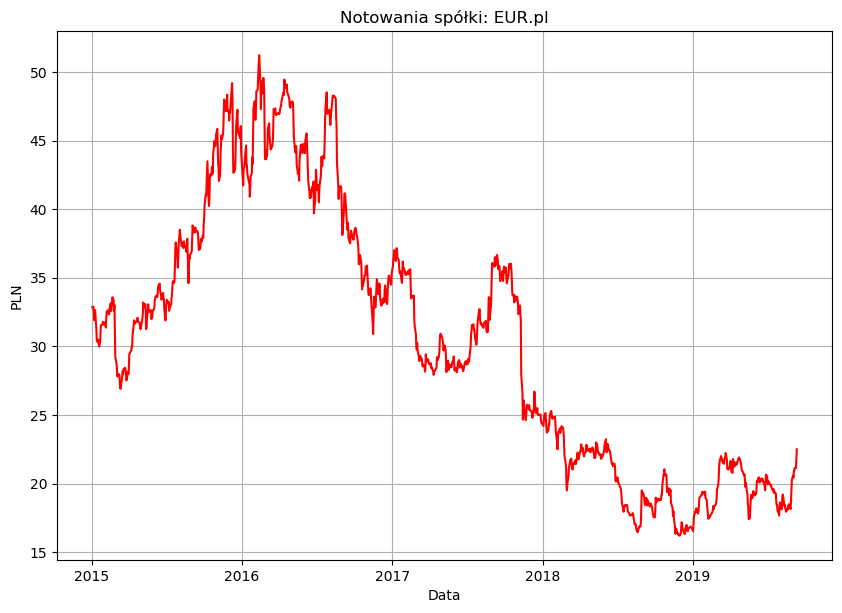

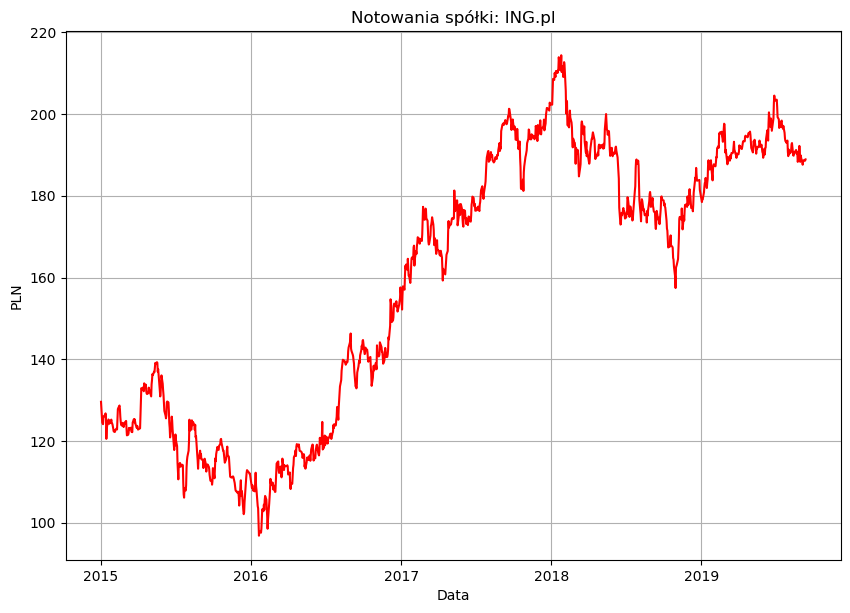

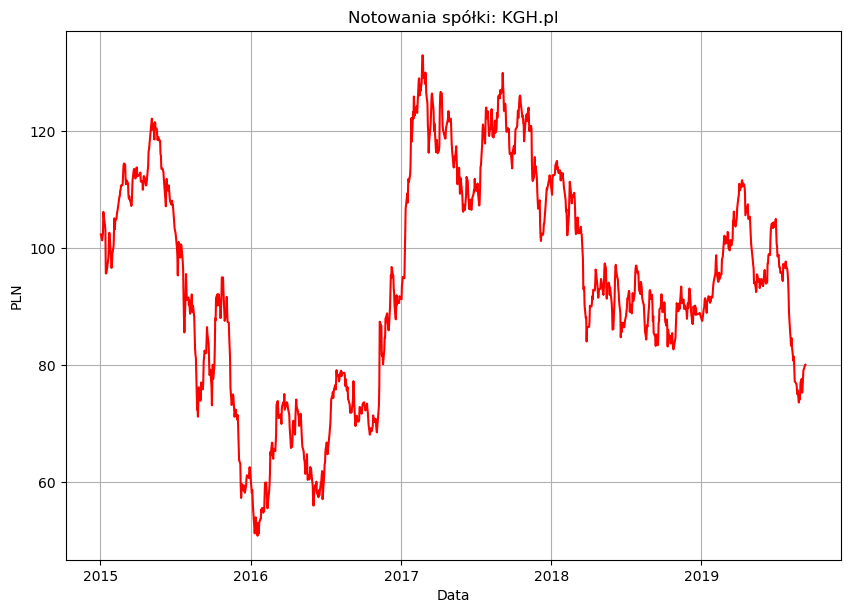

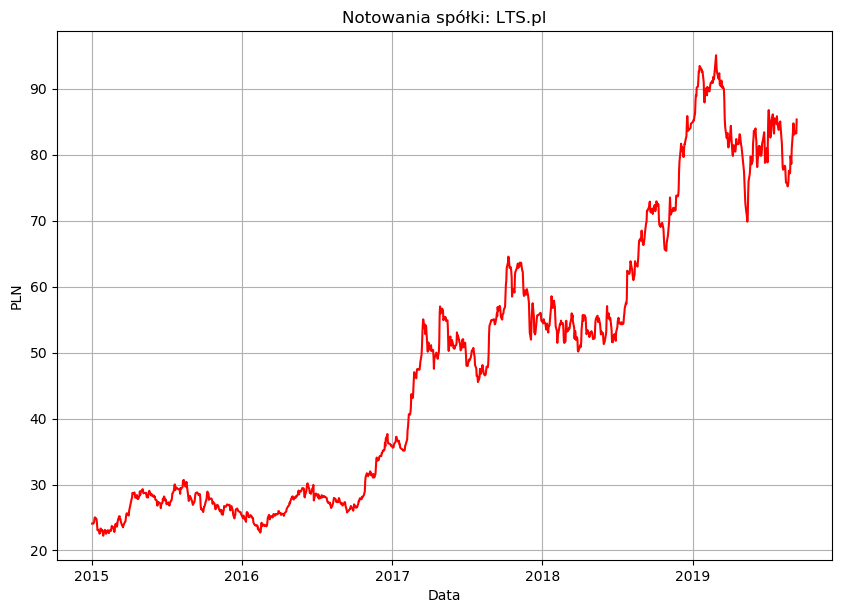

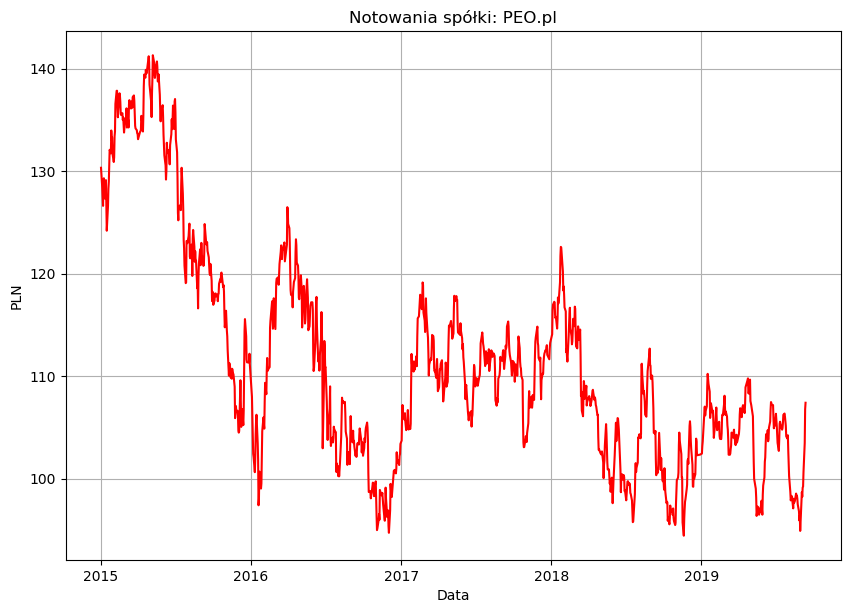

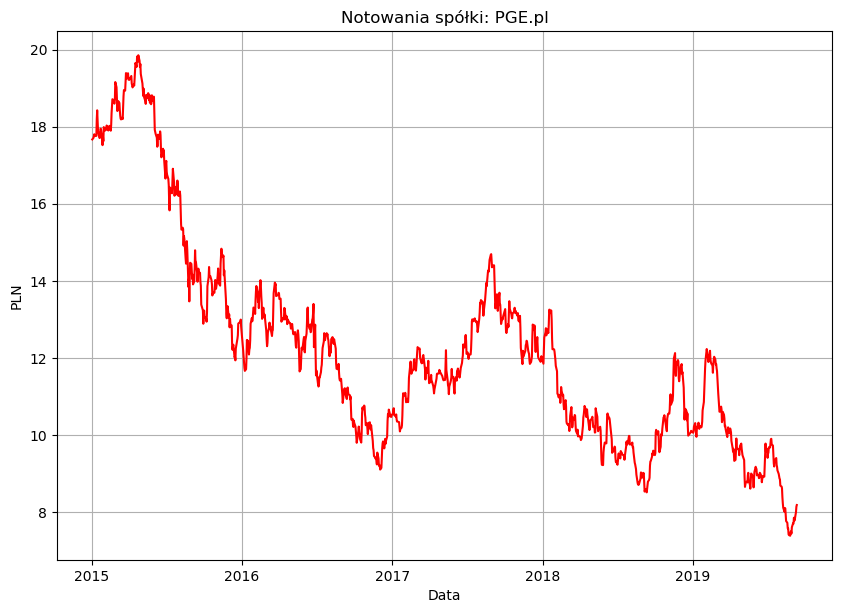

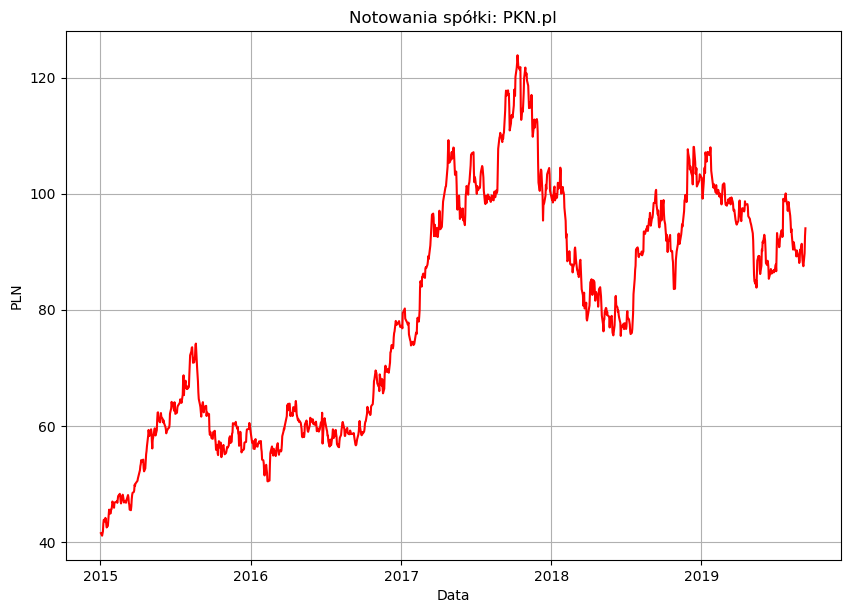

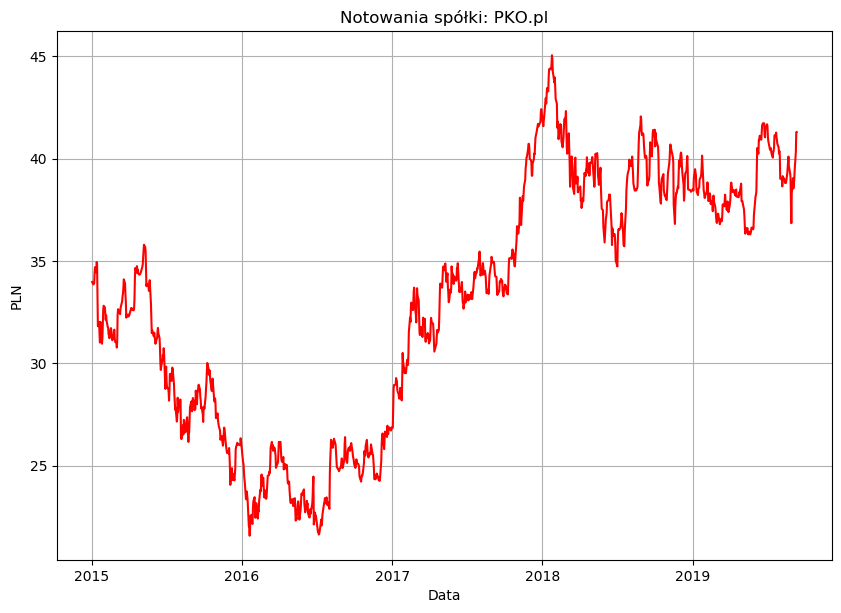

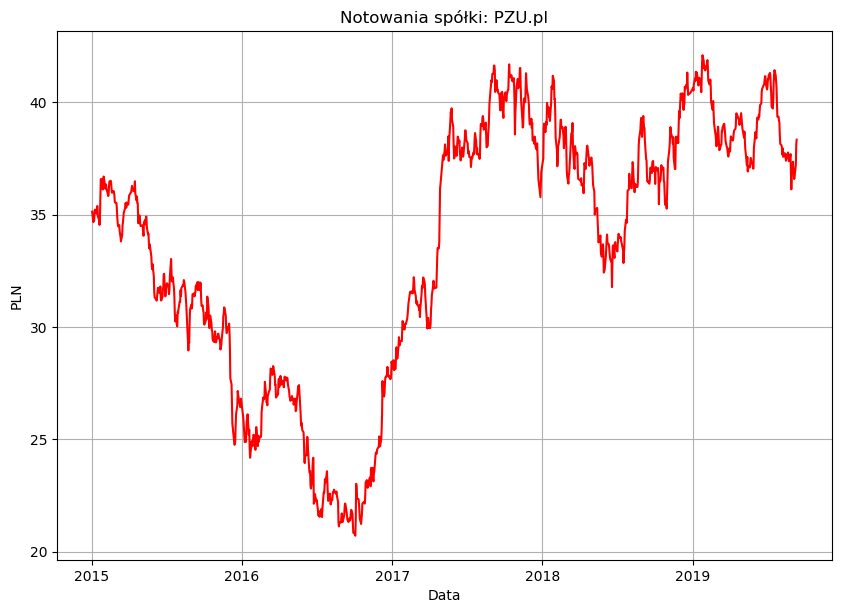

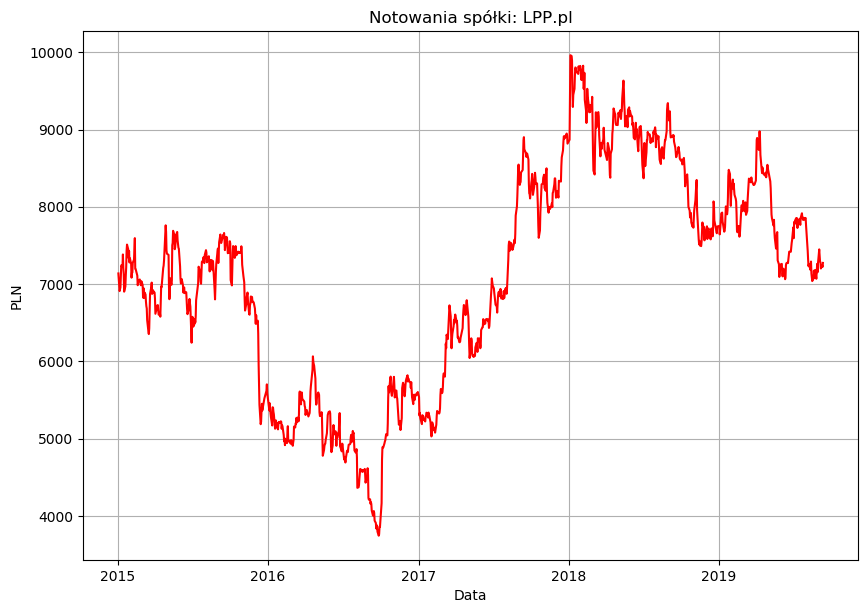

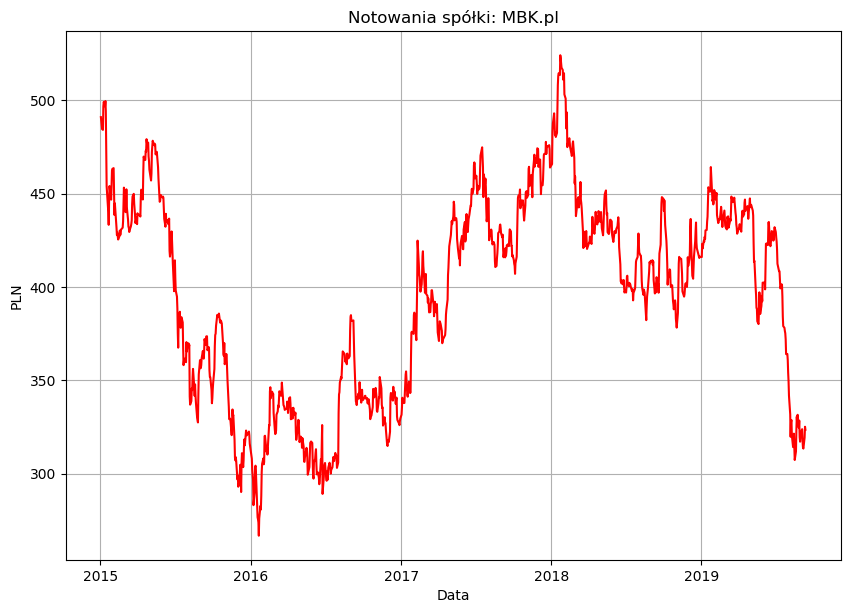

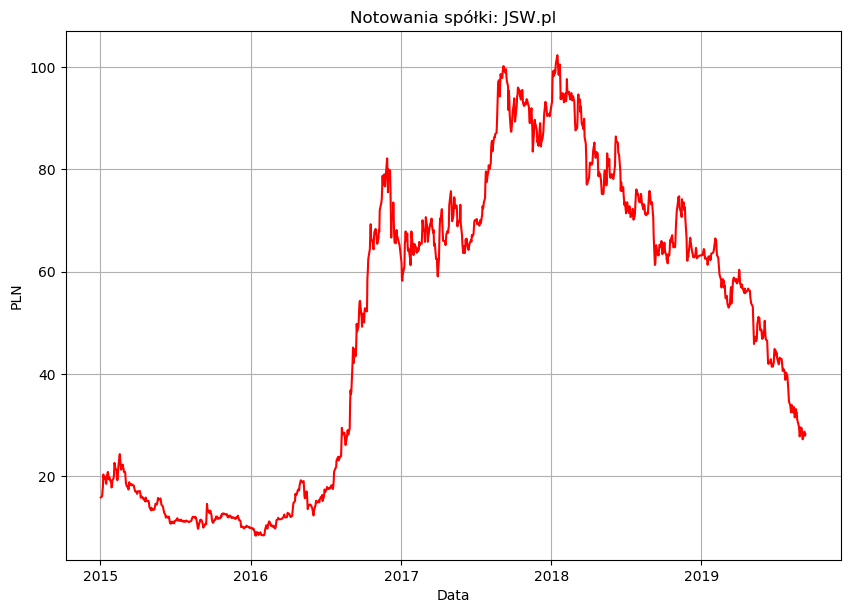

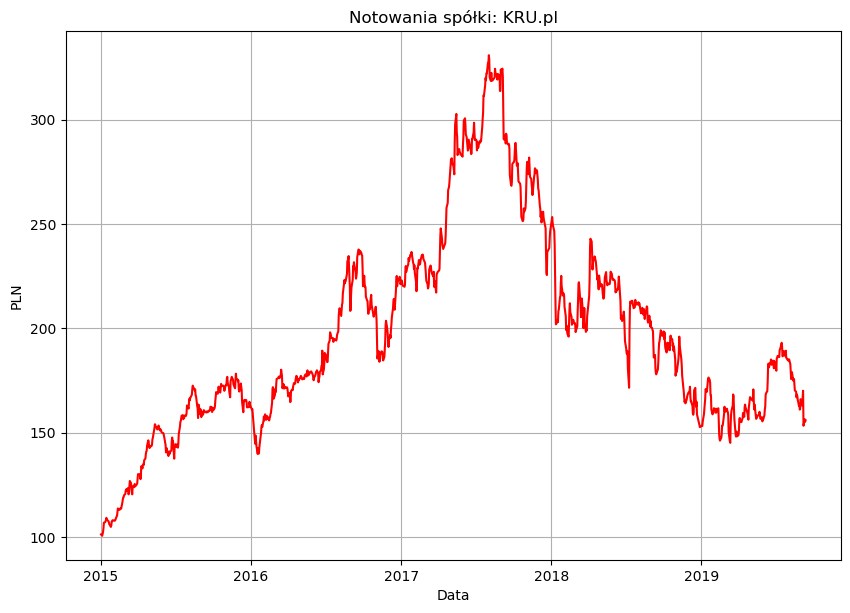

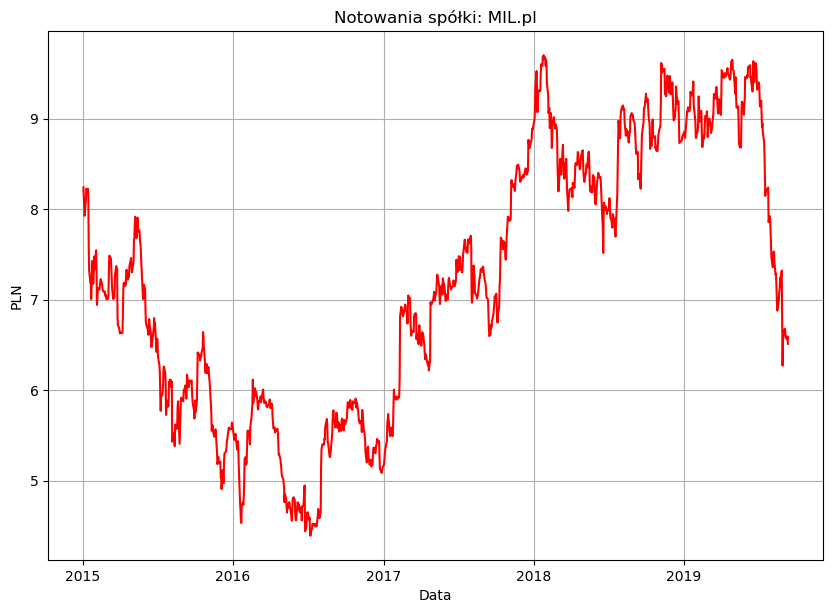

In [7]:
from datetime import datetime
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
pd.plotting.register_matplotlib_converters()

from datetime import datetime
time_from = datetime.now()
print(time_from)

def modify_source(df):
    df['Date'] = df.index
    df = df.reset_index(drop=True)
    cols = list(df.columns)
    df = df[[cols[-1]] + cols[0:5]]

def mean_seirie():
    df['Mean'] = (df['High'] + df['Low']) / 2
    
for symbol in ['FTE.pl', 'WIG20.pl', 'CCC.pl', 'ENA.pl', 'EUR.pl', 'ING.pl', 'KGH.pl', 'LTS.pl', 'PEO.pl', 'PGE.pl', 'PKN.pl', 'PKO.pl', 'PZU.pl', 'LPP.pl', 'MBK.pl', 'JSW.pl', 'KRU.pl', 'MIL.pl']:
#     symbol = input("Wprowadż symbol akcji lub indeksu: ") 
    df = web.DataReader(symbol, 'stooq')
    modify_source(df)
    mean_seirie()
    # date_from = input('Pokaż notowania od (RRRR-MM-DD): ')
    data_from = df.loc[df['Date'] >= '2015-01-01']
    x = list(data_from['Date'])
    y = list(data_from['Mean'])
    plt.figure(figsize=(10,7), dpi=100)
    plt.plot(x, y, color='red', marker='', linestyle='solid')
    plt.title(f"Notowania spółki: {symbol}")
    plt.ylabel('PLN')
    plt.xlabel("Data")
    plt.grid()
#     plt.show()
    plt.savefig(f'{symbol}.png')
    
time_to = datetime.now()
print(time_to)
print(time_to - time_from)

In [ ]:
'FTE.pl', 'WIG20.pl', 'CCC.pl', 'ENA.pl', 'EUR.pl', 'ING.pl', 'KGH.pl', 'LTS.pl', 'PEO.pl', 'PGE.pl', 'PKN.pl', 'PKO.pl', 'PZU.pl', 'LPP.pl', 'MBK.pl', 'JSW.pl', 'KRU.pl', 'MIL.pl'